# Lead Score Case Study

## Problem Statement:
 - X Education wants to select most promising leads that can be converted to paying customers. Although the company generates a lot of leads only a few are converted into paying customers, wherein the company wants a higher lead conversion. Leads come through numerous modes like email, advertisements on websites, google searches etc. The companys has had 30% conversion rate.  
 


## Objective:
 - The company requires a model to be built for selcting most promising leads. Lead score to be given to each leads such that it indicates how promising the lead could be. The model to be built in lead conversion rate around 80% or more.



In [1]:
# importing libraries


import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

### 1. Data import   

In [2]:
# impporting csv file
lead = pd.read_csv("Leads.csv")

In [3]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
lead.shape

(9240, 37)

In [6]:
# common check for outliers
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# checking for null percentage
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### 2. Data cleaning

##### null values and  redundant data treatment

In [8]:
# reveiwing various columns and its values 
lead["Specialization"].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

as seen the speciaization column has null values as "select". Further, checking some more columns for the same type elements 

In [9]:
lead["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
WeLearn                 1
NC_EDM                  1
Pay per Click Ads       1
welearnblog_Home        1
testone                 1
youtubechannel          1
blog                    1
Name: Lead Source, dtype: int64

In [10]:
# replacing case error 
lead["Lead Source"] = lead["Lead Source"].replace("google", "Google")

# since google is the most sourced element, null values are imputed with google values 
lead["Lead Source"] = lead["Lead Source"].replace(np.nan, "Google")

In [11]:
lead["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [12]:
lead["Country"].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Kuwait                     4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Uganda                     2
Italy                      2
China                      2
Ghana                      2
Asia/Pacific Region        2
Bangladesh                 2
Belgium                    2
Netherlands                2
Philippines                2
Denmark                    1
Kenya                      1
Russia                     1
Malaysia                   1
Vietnam                    1
Sri Lanka                  1
Switzerland   

this column has a high no of null values, and since most of the amount of convertions from abroad is low this column is dropped

In [13]:
# dropping the columns for above metioned reason
lead.drop(labels = "Country", inplace = True, axis =1)

In [14]:
lead["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [15]:
lead["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [16]:
lead["How did you hear about X Education"].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [17]:
lead["City"].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [18]:
# dropping columns with high null values

lead.drop(["Asymmetrique Profile Score", "Asymmetrique Activity Score", "Asymmetrique Profile Index" ,"Asymmetrique Activity Index", "Lead Profile", "Lead Quality", "Tags" ,"City",], inplace = True, axis = 1)

In [19]:
# since the total visits have a low no of null values, its imputed with the columns median 
 
lead['TotalVisits'] = lead['TotalVisits'].replace(np.nan, lead['TotalVisits'].median())

In [20]:
lead['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [21]:
# the null values in the last activity are imputed with "no source", the reason being it has low no of null values and can be highly useful for analysis

lead['Last Activity'] = lead['Last Activity'].replace(np.nan, "no source")

In [22]:
# the coulmns has low number of null values, its being imputed

lead["Page Views Per Visit"] = lead["Page Views Per Visit"].replace(np.nan, lead["Page Views Per Visit"].median())

In [23]:
             
lead["What matters most to you in choosing a course"].value_counts()                  

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [24]:
# replacing Select as "no information" in both the columns to ease the analysis
lead["How did you hear about X Education"]= lead["How did you hear about X Education"].replace("Select", "No information")
lead["Specialization"]= lead["Specialization"].replace("Select", "No information")

# since sepcialization is a most important variable and it has less than 25% null values, its null vaues are being imputed as no information 
lead["Specialization"]= lead["Specialization"].replace(np.nan, "No information")

In [25]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Specialization                                    0.00
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [26]:
# dropping columns with null values higher than 20%
lead.drop(["What is your current occupation", "How did you hear about X Education", "What matters most to you in choosing a course"], inplace = True, axis =1)

In [27]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9240 non-null   object 
 4   Do Not Email                              9240 non-null   object 
 5   Do Not Call                               9240 non-null   object 
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9240 non-null   float64
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Page Views Per Visit                      9240 non-null   float64
 10  Last Activity                       

##### outlier treatment

In [28]:
# checking outliers
lead.describe(percentiles = [0.10, 0.25, 0.50, 0.75, 0.80, 0.92, 0.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
10%,586361.700000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
80%,641577.600000,1.000000,5.000000,1087.200000,4.000000
92%,652786.640000,1.000000,8.000000,1449.880000,5.000000


there are outliers in total visits, time spent on website, page veiws per visit columns. but to know better boxplot is being done

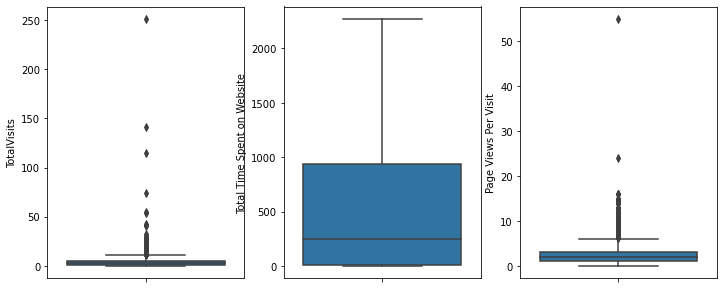

In [29]:
# boxlplot for all numerical columns
plt.figure(figsize = (12, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y = 'TotalVisits', data = lead)
plt.subplot(1, 3, 2)
sns.boxplot(y = "Total Time Spent on Website", data = lead)
plt.subplot(1, 3, 3)
sns.boxplot(y = "Page Views Per Visit", data = lead)

In [30]:
# the plot shows total visits and page veiws per vist as having outliers
# deleting that values from the dataframe

lead = lead[lead["TotalVisits"]< lead["TotalVisits"].quantile(0.99)]

In [31]:
lead.describe(percentiles = [0.25,0.50,0.75,0.80,0.92,0.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9141.00000,9141.000000,9141.000000,9141.000000,9141.000000
mean,617233.45192,0.385406,3.179740,486.074609,2.329506
std,23413.72193,0.486718,2.913631,547.856302,2.046673
min,579533.00000,0.000000,0.000000,0.000000,0.000000
25%,596519.00000,0.000000,1.000000,10.000000,1.000000
50%,615563.00000,0.000000,3.000000,247.000000,2.000000
75%,637414.00000,1.000000,5.000000,933.000000,3.000000
80%,641612.00000,1.000000,5.000000,1086.000000,4.000000
92%,652805.00000,1.000000,8.000000,1449.000000,5.000000
99%,659592.80000,1.000000,13.000000,1839.600000,9.000000


In [32]:
# the plot shows that the time spent on website column to have outliers

lead = lead[lead["Total Time Spent on Website"] < lead["Total Time Spent on Website"].quantile(0.99)]

In [33]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9049 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9049 non-null   object 
 1   Lead Number                               9049 non-null   int64  
 2   Lead Origin                               9049 non-null   object 
 3   Lead Source                               9049 non-null   object 
 4   Do Not Email                              9049 non-null   object 
 5   Do Not Call                               9049 non-null   object 
 6   Converted                                 9049 non-null   int64  
 7   TotalVisits                               9049 non-null   float64
 8   Total Time Spent on Website               9049 non-null   int64  
 9   Page Views Per Visit                      9049 non-null   float64
 10  Last Activity                       

### 3. Exploratory data analysis

In [34]:
# function for countplots for analysing different categorial variables with converted column
def cplot(b):
    plt.figure(figsize = (9,5))    
    a =sns.countplot(x = b, hue = lead["Converted"], data = lead, palette = "magma")
    plt.setp(a.xaxis.get_majorticklabels(),rotation= 90)
    
    plt.show()

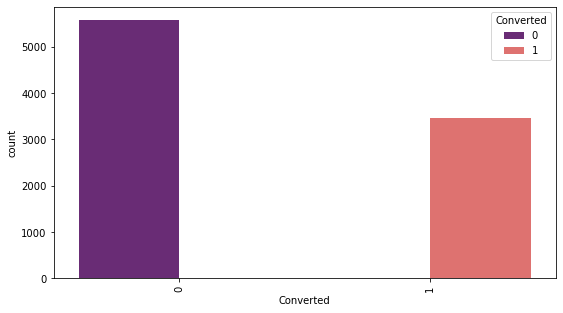

In [35]:
cplot("Converted")

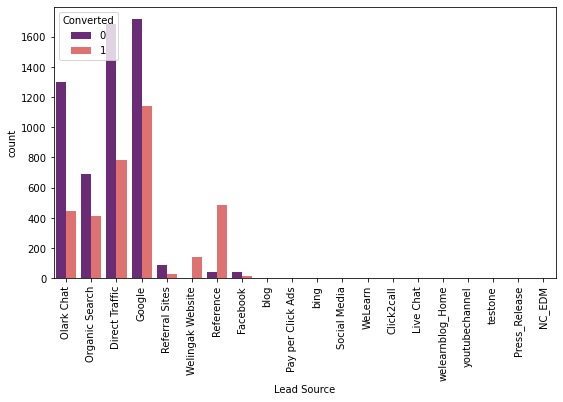

In [36]:
cplot("Lead Source")

google searches has had high conversions compared to other modes, whilst references has had high conversion rate.

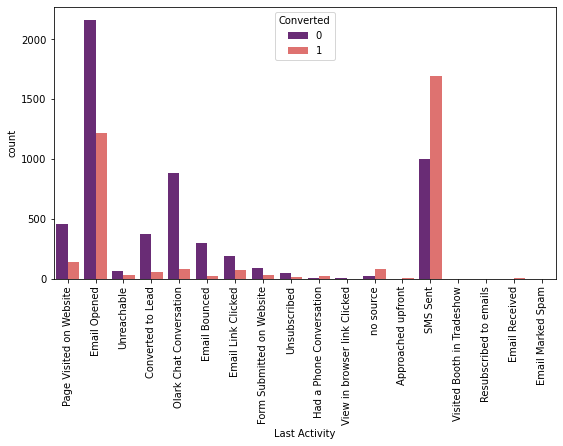

In [37]:
cplot("Last Activity")

sms has shown to be a promising method for getting higher confirmed leads

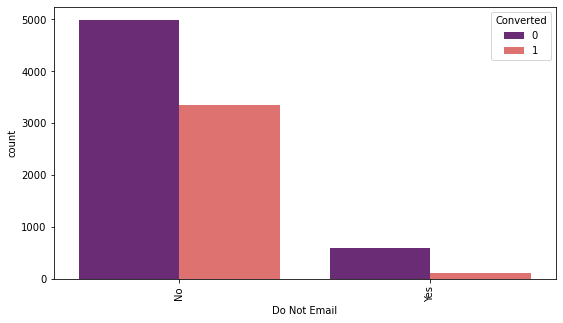

In [38]:
cplot("Do Not Email")

most people do not prefer communicating through emails

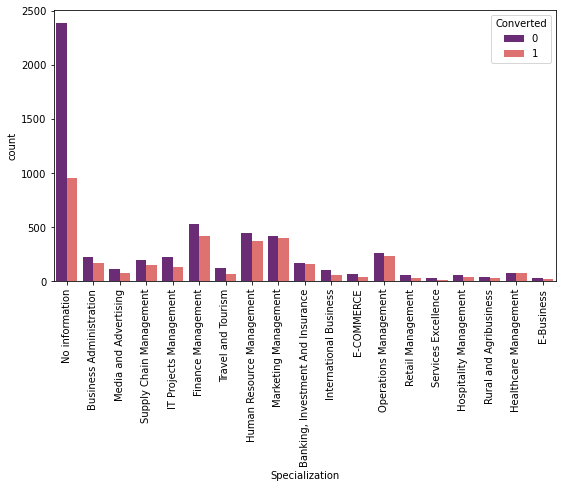

In [39]:
cplot("Specialization")

most of the leads have no information about specialization. On the other hand,
marketing management, human resources management has high conversion rates. people from these speciaizations can be promising leads

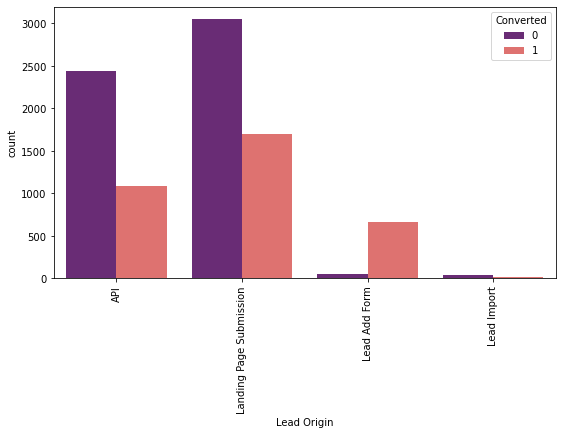

In [40]:
cplot("Lead Origin")

landing page submissions has had high lead conversions

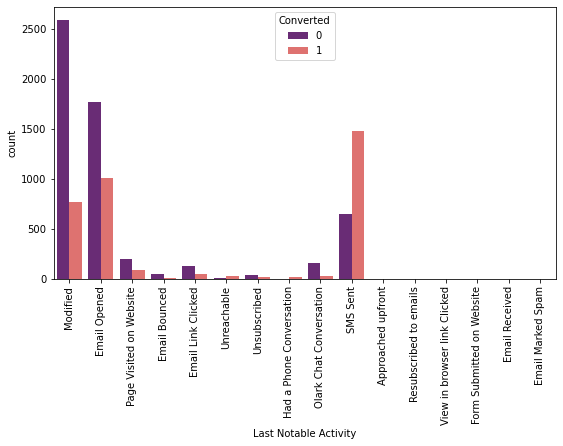

In [41]:
cplot("Last Notable Activity")

most leads are converted with last alert messages

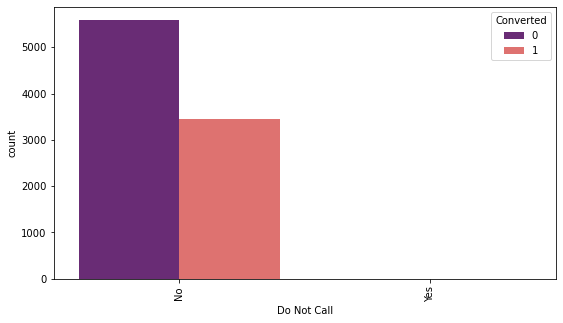

In [42]:
cplot("Do Not Call")

most leads prefer not to informed through phone

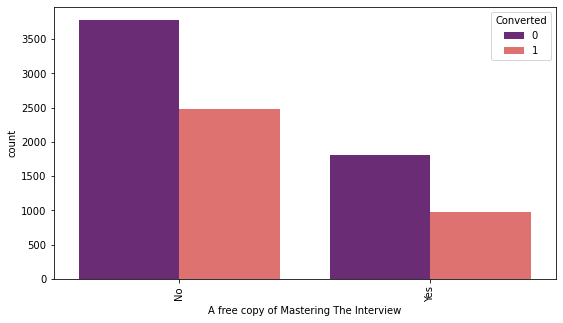

In [43]:
cplot("A free copy of Mastering The Interview")

leads prefer less copies of interveiws

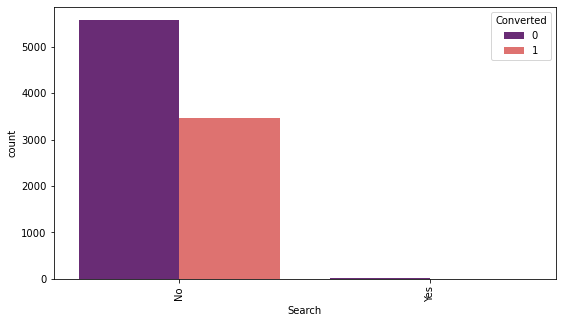

In [44]:
cplot("Search")

the above graph shows searches are not good source of leads

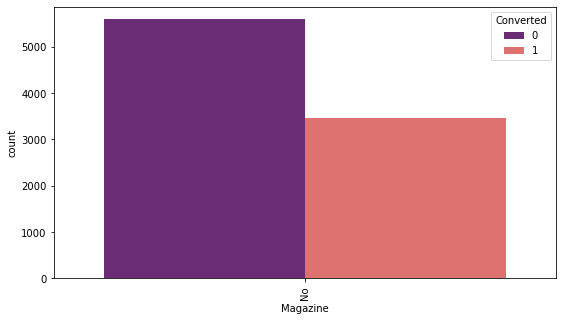

In [45]:
cplot("Magazine")

magazines do not have higher conversion rate

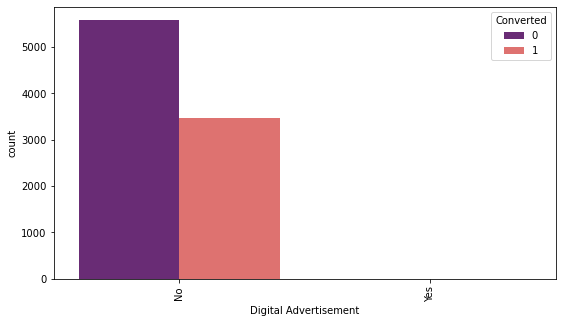

In [46]:
cplot("Digital Advertisement")

based on the above graph digital advertisments do not have promising leads

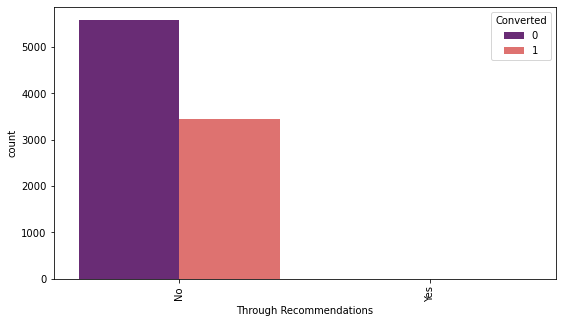

In [47]:
cplot("Through Recommendations")

from the above graph, recommedations are not a good source for promising leads

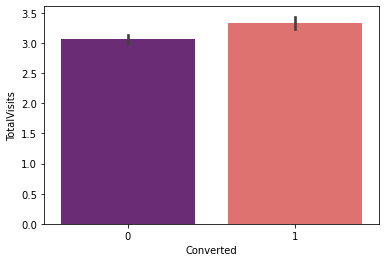

In [48]:
sns.barplot(y = 'TotalVisits', x='Converted', palette='magma', data = lead)
plt.show()

higher total visits have a slight higher chances of being a promising lead

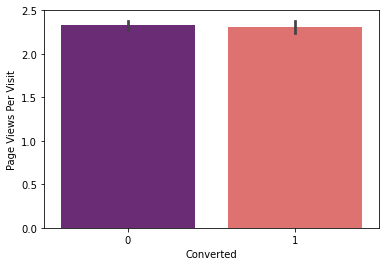

In [49]:
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='magma', data = lead)
plt.show()

page veiws per visit does not convey much about the leads

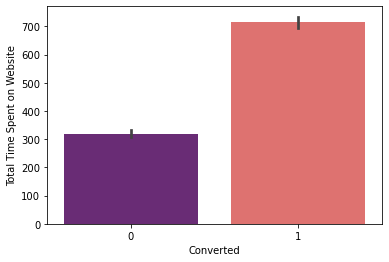

In [50]:
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='magma', data = lead)
plt.show()

people spending higher than average time are promising leads

### 4. Data preparation for model building

##### Dummy variable creation:

In [51]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9049 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9049 non-null   object 
 1   Lead Number                               9049 non-null   int64  
 2   Lead Origin                               9049 non-null   object 
 3   Lead Source                               9049 non-null   object 
 4   Do Not Email                              9049 non-null   object 
 5   Do Not Call                               9049 non-null   object 
 6   Converted                                 9049 non-null   int64  
 7   TotalVisits                               9049 non-null   float64
 8   Total Time Spent on Website               9049 non-null   int64  
 9   Page Views Per Visit                      9049 non-null   float64
 10  Last Activity                       

In [52]:
# converting strings to binary

d_list = ["Receive More Updates About Our Courses","Get updates on DM Content","I agree to pay the amount through cheque", "Do Not Email","Do Not Call", "Search", "Magazine", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement", "Through Recommendations", "A free copy of Mastering The Interview"]

def bmap(x):
    return x.map({"Yes" : 1, "No" : 0})

In [53]:
lead[d_list] = lead[d_list].apply(bmap)

In [54]:
# creating dummies for all the categorical variables

# steps followed for creating dummy varibles
# 1. get dummies stored in dataframe
# 3. concating both the data frames
# 4. drop former variables

dum = pd.get_dummies(lead[["Lead Origin", "Last Activity", "Specialization", "Last Notable Activity","Lead Source"]])

leadct = pd.concat([lead, dum], axis = 1)
leadct.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
leadct.drop(["Lead Origin", "Last Activity", "Specialization", "Last Notable Activity","Lead Source","Update me on Supply Chain Content"], inplace = True, axis = 1)

In [56]:
leadct.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
leadct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9049 entries, 0 to 9239
Data columns (total 96 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Prospect ID                                         9049 non-null   object 
 1   Lead Number                                         9049 non-null   int64  
 2   Do Not Email                                        9049 non-null   int64  
 3   Do Not Call                                         9049 non-null   int64  
 4   Converted                                           9049 non-null   int64  
 5   TotalVisits                                         9049 non-null   float64
 6   Total Time Spent on Website                         9049 non-null   int64  
 7   Page Views Per Visit                                9049 non-null   float64
 8   Search                                              9049 non-null   int64  
 9

### 5. Train-Test split

In [58]:
# dropping less relevant columns
leadct.drop(["Lead Number", "Prospect ID"], axis =1, inplace =True)

X = leadct.drop(["Converted"], axis =1)

In [59]:
# converting from array to dataframe
y = leadct["Converted"]
y = pd.DataFrame(y)

y.head()

,Converted
0,0
1,0
2,1
3,0
4,1


In [60]:
# splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

### 6. Feature scaling:

In [61]:
# variables to be scaled:
scal = ["TotalVisits" , "Total Time Spent on Website", "Page Views Per Visit"] 

In [62]:
# scaling variables 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train[scal] = scaler.fit_transform(X_train[scal])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel
9028,0,0,0.0000,0.000000,0.0000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6671,0,0,0.1250,0.252855,0.1250,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8771,0,0,0.0000,0.000000,0.0000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2902,0,0,0.2500,0.127243,0.2500,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
945,0,0,0.1875,0.225666,0.1875,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 7. Model building

##### Model_1

In [63]:
# Building a logistic regression model
mod = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
mod.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6334
Model:                            GLM   Df Residuals:                     6257
Model Family:                Binomial   Df Model:                           76
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 09 Aug 2021   Deviance:                          nan
Time:                        10:56:41   Pearson chi2:                 7.83e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                              -6.075e+14   1.17e+07  -5.17e+07      0.000   -6.08e+14   -6.08e+14
Do Not Email                                       -1.548e+14   4.53e+06  -3.42e+07      0.000   -1.55e+14   -1.55e+14
Do Not Call                                        -2.402e+14   4.77e+07  -5.03e+06      0.000    -2.4e+14    -2.4e+14
TotalVisits                                         4.953e+14   7.78e+06   6.36e+07      0.000    4.95e+14    4.95e+14
Total Time Spent on Website                         2.817e+15   3.43e+06   8.22e+08      0.000    2.82e+15    2.82e+15
Page Views Per Visit                               -1.021e+15   1.14e+07  -8.94e+07      0.000   -1.02e+15   -1.02e+15
Search                                             -3.798e+14   2.29e+07  -1.66e+07      0.000    -3.8e+14    -3.8e+14
Magazine                                              20.4518   2.17e-07   9.41e+07      0.000      20.452      20.452
Newspaper Article                                      4.2706   1.06e-07   4.03e+07      0.000       4.271       4.271
X Education Forums                                   -18.1947   2.07e-07   -8.8e+07      0.000     -18.195     -18.195
Newspaper                                          -6.672e+15   6.73e+07  -9.91e+07      0.000   -6.67e+15   -6.67e+15
Digital Advertisement                              -6.616e+14   4.76e+07  -1.39e+07      0.000   -6.62e+14   -6.62e+14
Through Recommendations                             7.378e+13   3.43e+07   2.15e+06      0.000    7.38e+13    7.38e+13
Receive More Updates About Our Courses                 6.4232      2e-07   3.21e+07      0.000       6.423       6.423
Get updates on DM Content                            -12.9047   2.19e-07   -5.9e+07      0.000     -12.905     -12.905
I agree to pay the amount through cheque              20.3160   2.43e-07   8.36e+07      0.000      20.316      20.316
A free copy of Mastering The Interview             -2.433e+14   2.74e+06  -8.89e+07      0.000   -2.43e+14   -2.43e+14
Lead Origin_API                                    -6.943e+14   1.13e+07  -6.13e+07      0.000   -6.94e+14   -6.94e+14
Lead Origin_Landing Page Submission                -5.092e+14   1.13e+07  -4.51e+07      0.000   -5.09e+14   -5.09e+14
Lead Origin_Lead Add Form                           9.577e+14   1.48e+07   6.46e+07      0.000    9.58e+14    9.58e+14
Lead Origin_Lead Import                            -3.618e+14   3.77e+07  -9.59e+06      0.000   -3.62e+14   -3.62e+14
Last Activity_Approached upfront                    2.731e+15   3.18e+07   8.58e+07      0.000    2.73e+15    2.73e+15
Last Activity_Converted to Lead                    -3.439e+14   6.59e+06  -5.22e+07      0.000   -3.44e+14  

In [64]:
# Using RFE to choose most relevant 20 columns
lg = LogisticRegression()

rfe = RFE(lg, 20)            
rfe = rfe.fit(X_train, y_train)

In [65]:
# veiwing supported columns
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 27),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', False, 61),
 ('Magazine', False, 70),
 ('Newspaper Article', False, 69),
 ('X Education Forums', False, 72),
 ('Newspaper', True, 1),
 ('Digital Advertisement', False, 59),
 ('Through Recommendations', False, 5),
 ('Receive More Updates About Our Courses', False, 68),
 ('Get updates on DM Content', False, 67),
 ('I agree to pay the amount through cheque', False, 65),
 ('A free copy of Mastering The Interview', False, 35),
 ('Lead Origin_API', False, 20),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 36),
 ('Last Activity_Approached upfront', True, 1),
 ('Last Activity_Converted to Lead', False, 39),
 ('Last Activity_Email Bounced', False, 14),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Marked Spam', False,

In [66]:
col = X_train.columns[rfe.support_]

##### Model_2

In [67]:
# keeping only the supoorted columns
X_train_ct = sm.add_constant(X_train[col])

# model
lg = sm.GLM(y_train,X_train_ct, family = sm.families.Binomial())
res = lg.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6334
Model:                            GLM   Df Residuals:                     6313
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2645.1
Date:                Mon, 09 Aug 2021   Deviance:                       5290.2
Time:                        10:56:44   Pearson chi2:                 6.34e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.8176      0.152     -5.395      0.000      -1.115      -0.521
Do Not Email                                      -1.4394      0.179     -8.060      0.000      -1.789      -1.089
TotalVisits                                        1.0362      0.280      3.705      0.000       0.488       1.584
Total Time Spent on Website                        3.9036      0.140     27.896      0.000       3.629       4.178
Page Views Per Visit                              -1.4574      0.428     -3.404      0.001      -2.297      -0.618
Newspaper                                        -25.6347   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Origin_Landing Page Submission               -1.3044      0.126    -10.318      0.000      -1.552      -1.057
Lead Origin_Lead Add Form                          3.5181      0.222     15.828      0.000       3.082       3.954
Last Activity_Approached upfront                  24.3410   3.16e+04      0.001      0.999   -6.19e+04    6.19e+04
Last Activity_Email Link Clicked                   0.9118      0.334      2.731      0.006       0.257       1.566
Last Activity_SMS Sent                             1.4360      0.076     18.949      0.000       1.287       1.584
Last Activity_Unsubscribed                         1.3036      0.469      2.782      0.005       0.385       2.222
Specialization_No information                     -1.5238      0.122    -12.464      0.000      -1.763      -1.284
Last Notable Activity_Email Link Clicked          -1.4100      0.417     -3.383      0.001      -2.227      -0.593
Last Notable Activity_Had a Phone Conversation    23.9112   2.01e+04      0.001      0.999   -3.94e+04    3.95e+04
Last Notable Activity_Modified                    -1.0871      0.081    -13.464      0.000      -1.245      -0.929
Last Notable Activity_Olark Chat Conversation     -1.8996      0.368     -5.159      0.000      -2.621      -1.178
Last Notable Activity_Unreachable                  1.7094      0.610      2.801      0.005       0.513       2.905
Lead Source_Click2call                            -2.9274      1.700     -1.722      0.085      -6.259       0.404
Lead Source_Olark Chat                             1.0169      0.133      7.650      0.000       0.756       1.277
Lead Source_Welingak Website                       2.1934      0.750      2.925      0.003       0.724       3.663
==================================================================================================================
"""

In [68]:
# manually dropping high p value columns
X_train_ct.drop(["Last Notable Activity_Had a Phone Conversation", "Newspaper"], axis = 1 ,inplace =True)

##### Model_4

In [69]:
# model building
lg = sm.GLM(y_train,X_train_ct, family = sm.families.Binomial())
res = lg.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6334
Model:                            GLM   Df Residuals:                     6315
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2655.6
Date:                Mon, 09 Aug 2021   Deviance:                       5311.1
Time:                        10:56:44   Pearson chi2:                 6.34e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.7935      0.151     -5.255      0.000      -1.089      -0.498
Do Not Email                                     -1.4404      0.178     -8.074      0.000      -1.790      -1.091
TotalVisits                                       1.0250      0.278      3.687      0.000       0.480       1.570
Total Time Spent on Website                       3.8847      0.139     27.859      0.000       3.611       4.158
Page Views Per Visit                             -1.4303      0.427     -3.352      0.001      -2.266      -0.594
Lead Origin_Landing Page Submission              -1.3140      0.126    -10.427      0.000      -1.561      -1.067
Lead Origin_Lead Add Form                         3.5044      0.222     15.781      0.000       3.069       3.940
Last Activity_Approached upfront                 22.3436   1.16e+04      0.002      0.998   -2.28e+04    2.28e+04
Last Activity_Email Link Clicked                  0.9100      0.334      2.727      0.006       0.256       1.564
Last Activity_SMS Sent                            1.4266      0.076     18.860      0.000       1.278       1.575
Last Activity_Unsubscribed                        1.2935      0.468      2.763      0.006       0.376       2.211
Specialization_No information                    -1.5298      0.122    -12.541      0.000      -1.769      -1.291
Last Notable Activity_Email Link Clicked         -1.4169      0.417     -3.401      0.001      -2.233      -0.600
Last Notable Activity_Modified                   -1.0935      0.081    -13.564      0.000      -1.252      -0.936
Last Notable Activity_Olark Chat Conversation    -1.9040      0.368     -5.176      0.000      -2.625      -1.183
Last Notable Activity_Unreachable                 1.6940      0.610      2.778      0.005       0.499       2.889
Lead Source_Click2call                           -2.9293      1.699     -1.724      0.085      -6.259       0.400
Lead Source_Olark Chat                            1.0036      0.133      7.569      0.000       0.744       1.263
Lead Source_Welingak Website                      2.1965      0.750      2.929      0.003       0.727       3.666
=================================================================================================================
"""

In [70]:
X_train_ct.drop(["Last Activity_Approached upfront"], axis = 1 ,inplace =True)

##### Model_5

In [71]:
# model building
lg = sm.GLM(y_train,X_train_ct, family = sm.families.Binomial())
res = lg.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6334
Model:                            GLM   Df Residuals:                     6316
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2659.6
Date:                Mon, 09 Aug 2021   Deviance:                       5319.2
Time:                        10:56:44   Pearson chi2:                 6.35e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.8027      0.151     -5.320      0.000      -1.098      -0.507
Do Not Email                                     -1.4440      0.178     -8.095      0.000      -1.794      -1.094
TotalVisits                                       1.0245      0.278      3.686      0.000       0.480       1.569
Total Time Spent on Website                       3.8873      0.139     27.889      0.000       3.614       4.160
Page Views Per Visit                             -1.4148      0.426     -3.318      0.001      -2.250      -0.579
Lead Origin_Landing Page Submission              -1.3081      0.126    -10.388      0.000      -1.555      -1.061
Lead Origin_Lead Add Form                         3.5215      0.222     15.889      0.000       3.087       3.956
Last Activity_Email Link Clicked                  0.8999      0.334      2.697      0.007       0.246       1.554
Last Activity_SMS Sent                            1.4237      0.076     18.830      0.000       1.275       1.572
Last Activity_Unsubscribed                        1.2944      0.468      2.764      0.006       0.377       2.212
Specialization_No information                    -1.5237      0.122    -12.503      0.000      -1.763      -1.285
Last Notable Activity_Email Link Clicked         -1.4088      0.417     -3.382      0.001      -2.225      -0.592
Last Notable Activity_Modified                   -1.0854      0.080    -13.490      0.000      -1.243      -0.928
Last Notable Activity_Olark Chat Conversation    -1.9070      0.368     -5.184      0.000      -2.628      -1.186
Last Notable Activity_Unreachable                 1.6943      0.610      2.778      0.005       0.499       2.890
Lead Source_Click2call                           -2.9430      1.697     -1.734      0.083      -6.270       0.384
Lead Source_Olark Chat                            1.0118      0.132      7.637      0.000       0.752       1.271
Lead Source_Welingak Website                      2.1813      0.750      2.909      0.004       0.712       3.651
=================================================================================================================
"""

In [72]:
X_train_ct.drop(["Lead Source_Click2call"], inplace =True, axis =1) 

In [73]:
# listing all the columns of the previous model
col = X_train_ct.columns
col

Index(['const', 'Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Last Activity_Email Link Clicked',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_No information',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website'],
      dtype='object')

In [74]:
# checking VIF values for further feature selection

vif = pd.DataFrame()
vif['Features'] = X_train_ct[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_ct[col].values, i) for i in range(X_train_ct[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,19.58
5,Lead Origin_Landing Page Submission,3.37
11,Last Notable Activity_Email Link Clicked,2.84
7,Last Activity_Email Link Clicked,2.80
10,Specialization_No information,2.78
4,Page Views Per Visit,2.73
2,TotalVisits,2.50
15,Lead Source_Olark Chat,2.17
6,Lead Origin_Lead Add Form,1.91
3,Total Time Spent on Website,1.29


as seen all the 16 variables have good VIF value. There are no high correlation between variables

##### Model_6

In [75]:
# model building
lg = sm.GLM(y_train,X_train_ct, family = sm.families.Binomial())
res = lg.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6334
Model:                            GLM   Df Residuals:                     6317
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2660.9
Date:                Mon, 09 Aug 2021   Deviance:                       5321.9
Time:                        10:56:47   Pearson chi2:                 6.34e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.8065      0.151     -5.349      0.000      -1.102      -0.511
Do Not Email                                     -1.4406      0.178     -8.086      0.000      -1.790      -1.091
TotalVisits                                       1.0230      0.278      3.678      0.000       0.478       1.568
Total Time Spent on Website                       3.8865      0.139     27.884      0.000       3.613       4.160
Page Views Per Visit                             -1.4137      0.426     -3.315      0.001      -2.249      -0.578
Lead Origin_Landing Page Submission              -1.3041      0.126    -10.365      0.000      -1.551      -1.057
Lead Origin_Lead Add Form                         3.4920      0.220     15.905      0.000       3.062       3.922
Last Activity_Email Link Clicked                  0.9027      0.333      2.708      0.007       0.249       1.556
Last Activity_SMS Sent                            1.4245      0.076     18.848      0.000       1.276       1.573
Last Activity_Unsubscribed                        1.2937      0.468      2.765      0.006       0.377       2.211
Specialization_No information                    -1.5179      0.122    -12.475      0.000      -1.756      -1.279
Last Notable Activity_Email Link Clicked         -1.4094      0.416     -3.387      0.001      -2.225      -0.594
Last Notable Activity_Modified                   -1.0868      0.080    -13.511      0.000      -1.244      -0.929
Last Notable Activity_Olark Chat Conversation    -1.9056      0.368     -5.184      0.000      -2.626      -1.185
Last Notable Activity_Unreachable                 1.6951      0.610      2.780      0.005       0.500       2.890
Lead Source_Olark Chat                            1.0108      0.132      7.630      0.000       0.751       1.270
Lead Source_Welingak Website                      2.2086      0.749      2.948      0.003       0.740       3.677
=================================================================================================================
"""

##### predicting with training set

In [76]:
# predicting with train set

y_train_pred = res.predict(X_train_ct)
y_train_pred[:10]

9028    0.211894
6671    0.094190
8771    0.211894
2902    0.057295
945     0.251709
9114    0.211894
8782    0.302794
8786    0.960534
5333    0.059853
313     0.078827
dtype: float64

In [77]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.21189443, 0.09419031, 0.21189443, 0.05729512, 0.25170881,
       0.21189443, 0.3027945 , 0.96053442, 0.05985303, 0.07882676])

In [78]:
# reveiwing
y_train.values

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]], dtype=int64)

In [79]:
y_train.values.reshape(-1)

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [80]:
# converting it into a dataframe

y_train_pred_f = pd.DataFrame({'Converted':y_train.values.reshape(-1),'Conversion_Prob':y_train_pred})
y_train_pred_f

,Converted,Conversion_Prob
0,1,0.211894
1,0,0.094190
2,0,0.211894
3,0,0.057295
4,0,0.251709
...,...,...
6329,0,0.038452
6330,0,0.211894
6331,0,0.208120
6332,0,0.494613


In [81]:
# replacing probability values with 0.40 cutoff
y_train_pred_f['Predicted'] = y_train_pred_f.Conversion_Prob.map(lambda x: 1 if x > 0.40 else 0)
y_train_pred_f.head()

,Converted,Conversion_Prob,Predicted
0,1,0.211894,0
1,0,0.094190,0
2,0,0.211894,0
3,0,0.057295,0
4,0,0.251709,0


In [82]:
# labeling lead scores
y_train_pred_f["Lead_Score"] = round(y_train_pred_f["Conversion_Prob"]*100, 2)

In [83]:
y_train_pred_f.head()

,Converted,Conversion_Prob,Predicted,Lead_Score
0,1,0.211894,0,21.19
1,0,0.094190,0,9.42
2,0,0.211894,0,21.19
3,0,0.057295,0,5.73
4,0,0.251709,0,25.17


### 8. Model Evaluation

In [84]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_f.Converted, y_train_pred_f.Predicted )
confusion

array([[3270,  671],
       [ 534, 1859]], dtype=int64)

In [85]:
metrics.accuracy_score(y_train_pred_f.Converted, y_train_pred_f.Predicted)

0.809756867698137

In [86]:
# true positive
TP = confusion[1,1]
# true negatives
TN = confusion[0,0]
#  false positives
FP = confusion[0,1] 
# false negatives
FN = confusion[1,0]

In [87]:
# sensitivity calculation
TP/(TP+FN)

0.7768491433347263

In [88]:
# specificity calculation
TN/(TN+FP)

0.8297386450139559

#### plotting ROC curve:

In [89]:
def roc( actual, prob ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, prob, drop_intermediate = False )
                                              
    auc_score = metrics.roc_auc_score( actual, prob )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [90]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_f.Converted, y_train_pred_f.Conversion_Prob, drop_intermediate = False )

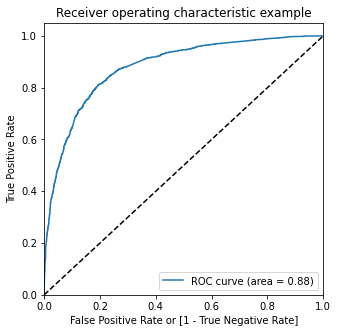

In [91]:
# plotting curve
roc(y_train_pred_f.Converted, y_train_pred_f.Conversion_Prob)

In [92]:
# this shows threshold cutoff for different probability values
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_f[i]= y_train_pred_f.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_f.head()

,Converted,Conversion_Prob,Predicted,Lead_Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.211894,0,21.19,1,1,1,0,0,0,0,0,0,0
1,0,0.094190,0,9.42,1,0,0,0,0,0,0,0,0,0
2,0,0.211894,0,21.19,1,1,1,0,0,0,0,0,0,0
3,0,0.057295,0,5.73,1,0,0,0,0,0,0,0,0,0
4,0,0.251709,0,25.17,1,1,1,0,0,0,0,0,0,0


###### accuracy, specificity, sensitivtiy

In [93]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])


# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity

from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_f.Converted, y_train_pred_f[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensitivity,specificity
0.0,0.0,0.377802,1.000000,0.000000
0.1,0.1,0.608936,0.968241,0.390764
0.2,0.2,0.736817,0.915169,0.628521
0.3,0.3,0.797600,0.837025,0.773662
0.4,0.4,0.809757,0.776849,0.829739
0.5,0.5,0.813230,0.706644,0.877950
0.6,0.6,0.796337,0.587129,0.923370
0.7,0.7,0.779444,0.504806,0.946207
0.8,0.8,0.754973,0.405349,0.967267
0.9,0.9,0.709662,0.252821,0.987059


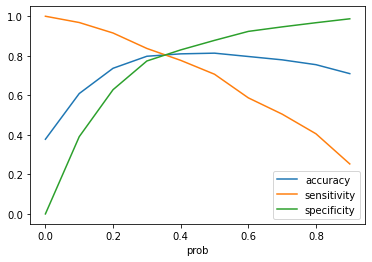

In [94]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

In [95]:
# this shows the approximate threshold value to be chosen 
y_train_pred_f['final_predicted'] = y_train_pred_f.Conversion_Prob.map( lambda x: 1 if x > 0.40 else 0)
y_train_pred_f.head()

,Converted,Conversion_Prob,Predicted,Lead_Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.211894,0,21.19,1,1,1,0,0,0,0,0,0,0,0
1,0,0.094190,0,9.42,1,0,0,0,0,0,0,0,0,0,0
2,0,0.211894,0,21.19,1,1,1,0,0,0,0,0,0,0,0
3,0,0.057295,0,5.73,1,0,0,0,0,0,0,0,0,0,0
4,0,0.251709,0,25.17,1,1,1,0,0,0,0,0,0,0,0


In [96]:
metrics.accuracy_score(y_train_pred_f.Converted, y_train_pred_f.final_predicted)

0.809756867698137

In [97]:
# Creating confusion matrix 
confusion0 = metrics.confusion_matrix(y_train_pred_f.Converted, y_train_pred_f.final_predicted )
confusion0

array([[3270,  671],
       [ 534, 1859]], dtype=int64)

In [98]:
# true positive
TP = confusion0[1,1]
# true negatives
TN = confusion0[0,0]
#  false positives
FP = confusion0[0,1] 
# false negatives
FN = confusion0[1,0]

In [99]:
# sensitivity calculation
TP/(TP+FN)

0.7768491433347263

In [100]:
# specificity calculation
TN/(TN+FP)

0.8297386450139559

##### Precision and recall tradeoff for train set

In [101]:
# plotting precision and recall curve
p, r, thresholds = precision_recall_curve(y_train_pred_f.Converted, y_train_pred_f.Conversion_Prob)

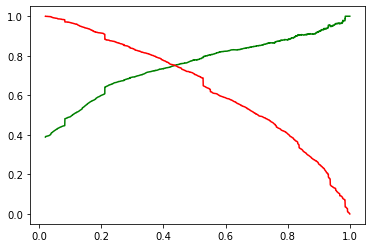

In [102]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [103]:
# precision score
print("precision : ")
precision_score(y_train_pred_f.Converted, y_train_pred_f.final_predicted)


precision : 


0.7347826086956522

In [104]:
# recall score
print("recall : ")
recall_score(y_train_pred_f.Converted, y_train_pred_f.final_predicted)


recall : 


0.7768491433347263

### 9. Making predicitons on the test set 

In [105]:
# scaling test set variables
X_test[scal] = scaler.transform(X_test[scal])

In [106]:
# dropping const from x_train columns
col = X_train_ct.columns
col =col.drop(["const"])

In [107]:
# col has the same columns that the latest model has
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Last Activity_Email Link Clicked,Last Activity_SMS Sent,Last Activity_Unsubscribed,Specialization_No information,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable,Lead Source_Olark Chat,Lead Source_Welingak Website
4684,0,0.3125,0.119630,0.3125,1,0,0,0,0,0,0,0,0,0,0,0
3069,0,0.0000,0.000000,0.0000,0,1,0,1,0,0,0,0,0,0,0,0
7977,0,0.0000,0.000000,0.0000,0,1,0,1,0,1,0,0,0,0,0,1
101,0,0.0000,0.000000,0.0000,0,0,0,0,0,1,0,1,0,0,1,0
126,0,0.0625,0.069059,0.0625,1,0,0,0,0,0,0,1,0,0,0,0


In [108]:
# adding constant
X_test_sm = sm.add_constant(X_test)

In [109]:
# prediciton
y_test_pred = res.predict(X_test_sm)

In [110]:
# converting from array to dataframe
y_test_pred_ = pd.DataFrame(y_test_pred)
y_test_pred_.head()

,0
4684,0.145827
3069,0.983858
7977,0.991844
101,0.083144
126,0.049575


In [111]:
# converting y_test values to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df['Id'] = y_test_df.index

In [112]:
# Removing index for both dataframes concatenate 

y_test_pred_.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# concatenating
y_pred_final = pd.concat([y_test_df, y_test_pred_],axis=1)

In [113]:
# renaming 0 to Converted_Prob

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final.head()

,Converted,Id,Converted_Prob
0,0,4684,0.145827
1,1,3069,0.983858
2,1,7977,0.991844
3,1,101,0.083144
4,0,126,0.049575


In [114]:
# measuring threshold based on preision, recall curve 
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.41 else 0)

In [115]:
y_pred_final.head()

,Converted,Id,Converted_Prob,final_predicted
0,0,4684,0.145827,0
1,1,3069,0.983858,1
2,1,7977,0.991844,1
3,1,101,0.083144,0
4,0,126,0.049575,0


In [116]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.801841620626151

In [117]:
# confusion matrix helps for further evaluaiton
confusion1 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion1

array([[1370,  277],
       [ 261,  807]], dtype=int64)

In [118]:
# true positive
TP = confusion1[1,1]
# true negatives
TN = confusion1[0,0]
#  false positives
FP = confusion1[0,1] 
# false negatives
FN = confusion1[1,0]

In [119]:
# sensitivity calculation
TP/(TP+FN)

0.7556179775280899

In [120]:
# specificity calculation
TN/(TN+FP)

0.8318154219793564

##### Precision recall curve for test set

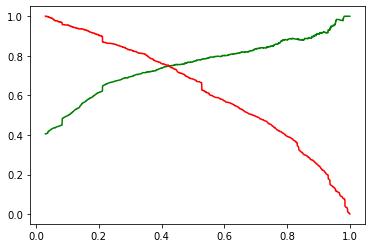

In [121]:
# test set 
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [122]:
# precision score
print("precision : ")
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)


precision : 


0.7444649446494465

In [123]:
# recall score
print("recall : " )
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

recall : 


0.7556179775280899

### Conclusion:

about EDA:
 - people spending higher than average time are promising leads
 - Sms messages can have a high impact on lead conversion
 - landing page submissions can help find out more leads
 - marketing management, human resources management has high conversion rates. people from these speciaizations can be promising leads
 - references and offers for refering a lead can be good source for higher conversions
 - a last alert messages can help good converions
 
 
about logistic regression model:
 - The model shows high close to 81% accuracy
 - the cut has been selected from Accuracy, Semsitivity, specificity measures and precision, recall curves.
 - the model shows 77% sensitivity and 83% specificity
 - the model finds correct promising leads and leads that have less chances of getting converted
 - overall this model proves to be accurate 